# Trabalho 3 - Equações Parabólicas e Hiperbólicas

## Métodos Numéricos para Equações Diferenciais

Este notebook contém a implementação e análise da equação unidimensional de advecção-difusão:

$$u_t + u_x = \frac{1}{Pe} u_{xx}$$

onde $Pe$ é o número de Péclet que caracteriza o balanço entre advecção e difusão.

### Objetivos:
1. Implementar e analisar a discretização por diferenças finitas da equação de advecção-difusão
2. Estudar o comportamento da solução para diferentes valores do número de Péclet:
   - Pe ≪ 1 (difusão dominante)
   - Pe = 1 (advecção e difusão equilibradas)
   - Pe ≫ 1 (advecção dominante)
3. Comparar diferentes esquemas numéricos:
   - Diferenças progressivas no tempo e centradas no espaço
   - Diferenças progressivas no tempo, centradas no espaço para termos difusivos e Upwind para termos advectivos

### Domínio do problema:
- Espaço: 0 ≤ x ≤ 15
- Tempo: 0 ≤ t ≤ 12
- Condição inicial: $u(x, 0) = \exp(-20(x-2)^2) + \exp(-(x-5)^2)$
- Condições de contorno periódicas

In [3]:
# Importações
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [4]:
# Parâmetros do Problema
L = 15.0  # Comprimento do domínio
T = 12.0  # Tempo total de simulação

# Condição inicial
def initial_condition(x):
    return np.exp(-20 * (x - 2)**2) + np.exp(-(x - 5)**2)


def solve_ftcs(Pe, Nx):
    dx = L / (Nx - 1)
    x = np.linspace(0, L, Nx)
    kappa = 1.0 / Pe

    cell_Pe = Pe * dx
    print(f"--- Iniciando FTCS com Pe = {Pe} ---")
    print(f"Número de Péclet da malha (Pe*dx): {cell_Pe:.2f}")

    dt = 0.4 * min(dx, dx**2 / (2 * kappa + 1e-9))
    Nt = int(T / dt)
    t = np.linspace(0, T, Nt)
    dt = T / (Nt - 1) 

    print(f"Nx = {Nx}, Nt = {Nt}, dx = {dx:.4f}, dt = {dt:.4f}")

    u = np.zeros((Nx, Nt))
    u[:, 0] = initial_condition(x)
    
    c_adv = dt / (2 * dx)
    c_diff = dt * kappa / dx**2
    
    for n in range(0, Nt - 1):
        for i in range(0, Nx):
            ip1 = (i + 1) % Nx
            im1 = (i - 1 + Nx) % Nx
            advection_term = c_adv * (u[ip1, n] - u[im1, n])
            diffusion_term = c_diff * (u[ip1, n] - 2*u[i, n] + u[im1, n])
            u[i, n+1] = u[i, n] - advection_term + diffusion_term
            
    return x, t, u


In [5]:
def plot_3d_side_by_side(results, titles, save_path="ftcs_results.png"):
    num_plots = len(results)
    fig = plt.figure(figsize=(6 * num_plots, 6))
    for idx, ((x, t, u), title) in enumerate(zip(results, titles)):
        t_step = max(1, len(t) // 100)
        x_step = max(1, len(x) // 100)
        t_plot = t[::t_step]
        x_plot = x[::x_step]
        u_plot = u[::x_step, ::t_step]
        T_grid, X_grid = np.meshgrid(t_plot, x_plot)
        ax = fig.add_subplot(1, num_plots, idx + 1, projection='3d')
        surf = ax.plot_surface(
            X_grid, T_grid, u_plot,
            cmap=cm.jet,
            rstride=1,
            cstride=1,
            linewidth=0,
            antialiased=True
        )
        ax.set_xlabel('x')
        ax.set_ylabel('t')
        ax.set_zlabel('u')
        ax.set_title(title, pad=10)
        ax.view_init(elev=30, azim=-60)
        cb = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12)
        cb.set_label('u')
    plt.tight_layout()
    plt.show()


--- Iniciando FTCS com Pe = 10 ---
Número de Péclet da malha (Pe*dx): 1.00
Nx = 151, Nt = 600, dx = 0.1000, dt = 0.0200
--- Iniciando FTCS com Pe = 1 ---
Número de Péclet da malha (Pe*dx): 0.10
Nx = 151, Nt = 6000, dx = 0.1000, dt = 0.0020
--- Iniciando FTCS com Pe = 0.5 ---
Número de Péclet da malha (Pe*dx): 0.05
Nx = 151, Nt = 12000, dx = 0.1000, dt = 0.0010


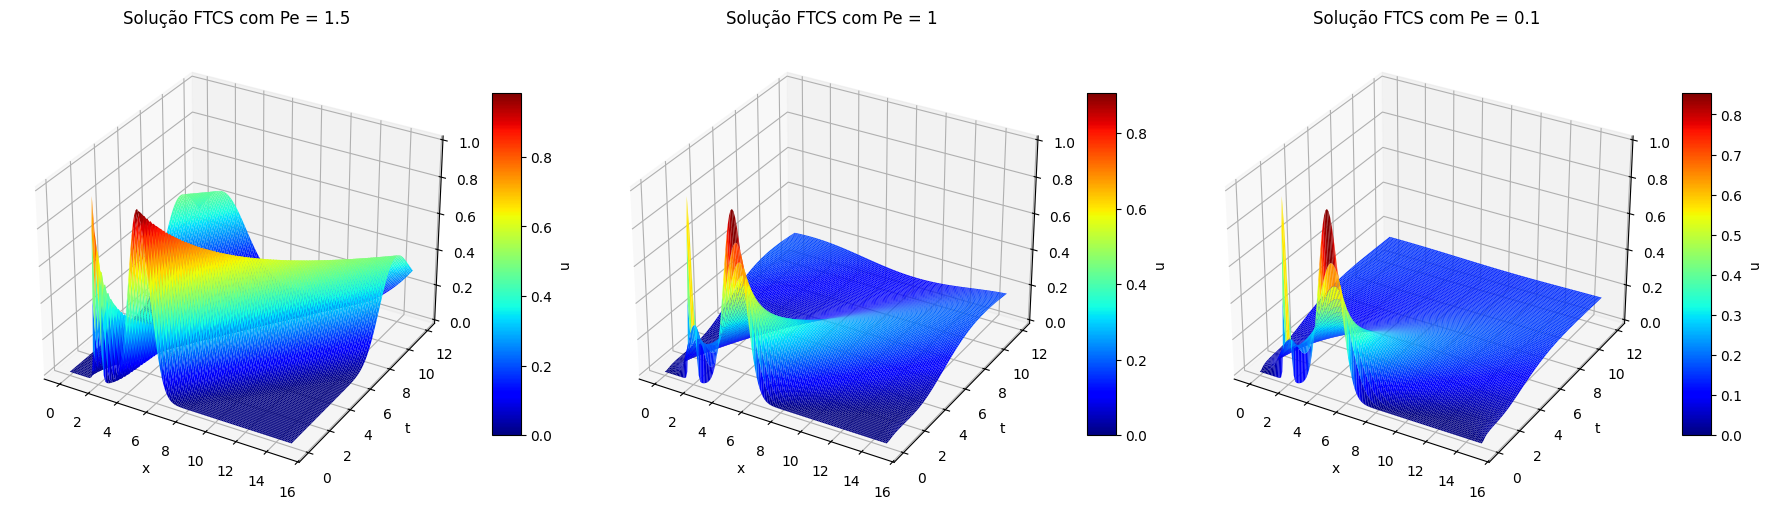

Gráfico salvo como 'ftcs_side_by_side.png'.


In [ ]:
# Parâmetros e execuções
cases = [
    (10, 151),
    (1,   151),
    (0.5,  151)
]
titles = [
    'Solução FTCS com Pe = 1.5',
    'Solução FTCS com Pe = 1',
    'Solução FTCS com Pe = 0.1'
]
results = [solve_ftcs(Pe, Nx) for Pe, Nx in cases]
plot_3d_side_by_side(results, titles, save_path="ftcs_side_by_side.png")


 Note que como as condicoes de contorno sao periódicas, o domínio age como um cilindro, portanto, com a difusao grande a onda de calor se propaga atravez do lado direito do dominio e comeca a esquentar o lado esquerdo.